# Lista 2: SEL0326 - Controle de Sistemas Lineares

In [134]:
import numpy as np
import control.matlab as matlab 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Exercícios teste

system:  <LinearIOSystem>: sys[62]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[1. 2.]
     [3. 4.]]

B = [[5.]
     [6.]]

C = [[7. 8.]]

D = [[9.]]

Eigenvalues of A matrix: [-0.37228132  5.37228132]
System is controllable
System is observable
System is unstable


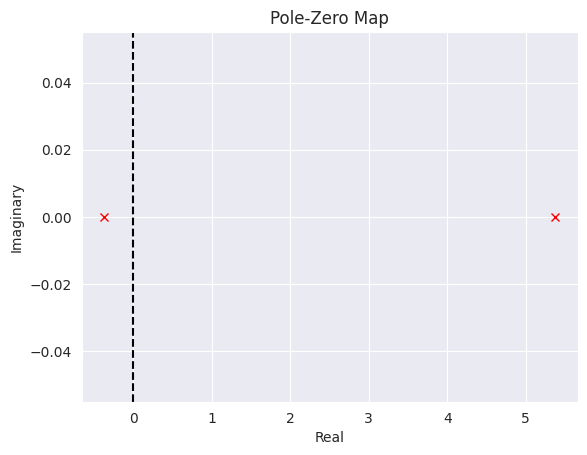

infinity value: 6.889287562668769e+47


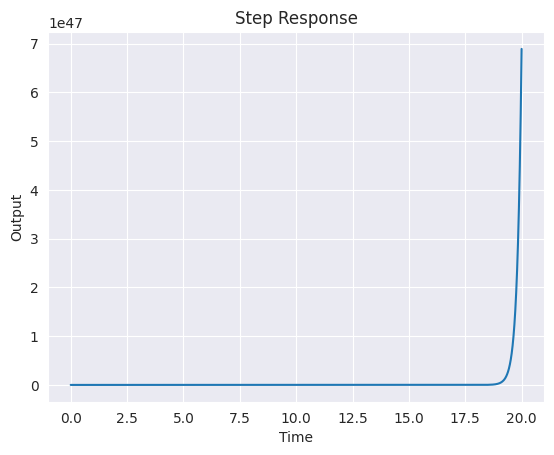

In [135]:
import numpy as np
import control.matlab as matlab 
import matplotlib.pyplot as plt

# Define the state space model matrices
A = np.array([[1, 2], [3, 4]])
B = np.array([[5], [6]])
C = np.array([[7, 8]])
D = np.array([[9]])

# Create the state space model
sys = matlab.ss(A, B, C, D)

print("system: ", sys)

# Calculate the eigenvalues of the A matrix
eigvals = np.linalg.eigvals(A)
print("Eigenvalues of A matrix:", eigvals)

# Determine the controllability and observability of the system
controllability_matrix = matlab.ctrb(A, B)
observability_matrix = matlab.obsv(A, C)

if np.linalg.matrix_rank(controllability_matrix) == A.shape[0]:
    print("System is controllable")
else:
    print("System is not controllable")

if np.linalg.matrix_rank(observability_matrix) == A.shape[0]:
    print("System is observable")
else:
    print("System is not observable")

# Determine the stability of the system
if np.all(eigvals.real < 0):
    print("System is stable")
else:
    print("System is unstable")

# Plot the poles of the system
plt.plot(eigvals.real, eigvals.imag, 'rx')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero Map')
plt.axvline(x=0, color='k', linestyle='--')
plt.show()


# Plot the step response of the system
t = np.linspace(0, 20, 1000)
y, time = matlab.step(sys, t)
# infinity value
print("infinity value:", y[-1])
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Step Response')
plt.show()


## Exercício 3 (lista 2)

<img src="eqa.png">

sendo: 
* $x = [x \ \dot \ x \ \theta \ \dot \theta]^T $ 
* $y = [x \ \theta]^T $

In [136]:
# Coefficients
k = 1
M = 1
r = 0.02
R = 100
l = 1
m = 0.1
g = 9.81

In [137]:
A = np.array([[0, 1, 0, 0], [0, -k**2/(M*R*r**2), -m*g/M, 0], [0, 0, 0, 1], [0, -k**2/(M*l*R*r**2), -(M + m)*g/(M*l), 0]])

B = np.array([[0], [-k/(M*R*r*l)], [0], [-k/(M*l*R*r)]])

C = np.array([[1, 0, 0, 0], [0, 0, 1, 0]])

D = np.array([[0], [0]])

sys = matlab.ss(A, B, C, D)

print("system: ", sys)

system:  <LinearIOSystem>: sys[63]
Inputs (1): ['u[0]']
Outputs (2): ['y[0]', 'y[1]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[  0.      1.      0.      0.   ]
     [  0.    -25.     -0.981   0.   ]
     [  0.      0.      0.      1.   ]
     [  0.    -25.    -10.791   0.   ]]

B = [[ 0. ]
     [-0.5]
     [ 0. ]
     [-0.5]]

C = [[1. 0. 0. 0.]
     [0. 0. 1. 0.]]

D = [[0.]
     [0.]]



In [138]:
# # Calculate Y(s)/U(s) = C(sI-A)^-1 B + D
# s = matlab.tf('s')
# s_matrix = [[s, 0, 0, 0], [0, s, 0, 0], [0, 0, s, 0], [0, 0, 0, s]]
# print("s_matrix: ", s_matrix)
# tf1 = np.linalg.inv(s_matrix - A)
# tf2 = tf1 @ B
# tf3 = C @ tf2 + D

# print("Transfer function: ", tf3)

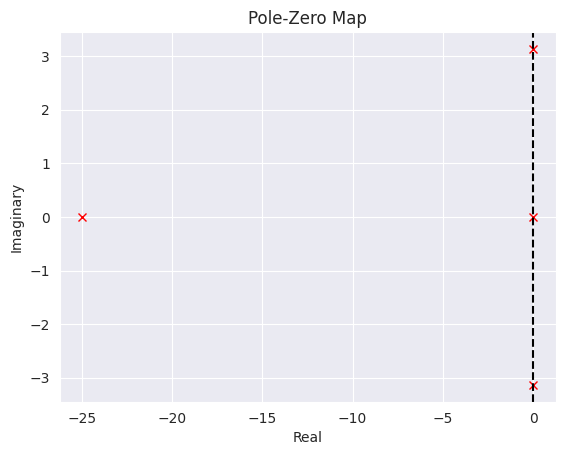

System is unstable
System is controllable
System is observable


In [139]:
# poles plot
eigvals = np.linalg.eigvals(A)
# Plot the poles of the system
plt.plot(eigvals.real, eigvals.imag, 'rx')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero Map')
plt.axvline(x=0, color='k', linestyle='--')
plt.show()

# estability
if np.all(eigvals.real < 0):
    print("System is stable")
else:
    print("System is unstable")

# Determine the controllability and observability of the system
controllability_matrix = matlab.ctrb(A, B)
observability_matrix = matlab.obsv(A, C)

if np.linalg.matrix_rank(controllability_matrix) == A.shape[0]:
    print("System is controllable")
else:
    print("System is not controllable")

if np.linalg.matrix_rank(observability_matrix) == A.shape[0]:
    print("System is observable")
else:
    print("System is not observable")


## Exercício 10: Avião 

In [140]:
A = np.array([[-10, 0, -10, 0], [0, -0.7, 9, 0], [0, -1, -0.7, 0], [1, 0, 0, 0]])

B = np.array([[20, 2.8], [0, -3.13], [0, 0], [0, 0]])

# controlability
controllability_matrix = matlab.ctrb(A, B)
if np.linalg.matrix_rank(controllability_matrix) == A.shape[0]:
    print("System is controllable")
else:
    print("System is not controllable")


# Combine matrices to form the controllability matrix O
O = np.hstack([B] + [np.linalg.matrix_power(A, i) @ B for i in range(1, A.shape[0])])

# Display the controllability matrix O
print("Controllability Matrix O:")
print(O)

# Check the rank of the controllability matrix
rank_O = np.linalg.matrix_rank(O)
print(f"\nRank of O: {rank_O}")

# Check if the system is controllable
if rank_O == A.shape[0]:
    print("The system is controllable.")
else:
    print("The system is not controllable.")

aaaaa =  [np.linalg.matrix_power(A, i) @ B for i in range(1, A.shape[0])]
# convert to numpy
aaaaa

System is controllable
Controllability Matrix O:
[[ 2.000000e+01  2.800000e+00 -2.000000e+02 -2.800000e+01  2.000000e+03
   2.487000e+02 -2.000000e+04 -2.443180e+03]
 [ 0.000000e+00 -3.130000e+00  0.000000e+00  2.191000e+00  0.000000e+00
   2.663630e+01  0.000000e+00 -5.808341e+01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  3.130000e+00  0.000000e+00
  -4.382000e+00  0.000000e+00 -2.356890e+01]
 [ 0.000000e+00  0.000000e+00  2.000000e+01  2.800000e+00 -2.000000e+02
  -2.800000e+01  2.000000e+03  2.487000e+02]]

Rank of O: 4
The system is controllable.


[array([[-200.   ,  -28.   ],
        [   0.   ,    2.191],
        [   0.   ,    3.13 ],
        [  20.   ,    2.8  ]]),
 array([[2000.    ,  248.7   ],
        [   0.    ,   26.6363],
        [   0.    ,   -4.382 ],
        [-200.    ,  -28.    ]]),
 array([[-20000.     ,  -2443.18   ],
        [     0.     ,    -58.08341],
        [     0.     ,    -23.5689 ],
        [  2000.     ,    248.7    ]])]

In [146]:
A @ A @ B

array([[2000.    ,  248.7   ],
       [   0.    ,   26.6363],
       [   0.    ,   -4.382 ],
       [-200.    ,  -28.    ]])

In [145]:
A ** 2 @ B 

array([[ 2.0000e+03,  2.8000e+02],
       [ 0.0000e+00, -1.5337e+00],
       [ 0.0000e+00, -3.1300e+00],
       [ 2.0000e+01,  2.8000e+00]])